In [1]:
import pandas as pd
df=pd.read_csv('french_twitter_reduced_final.csv',sep=';')

# Dataset Size and Balanced Accuracy

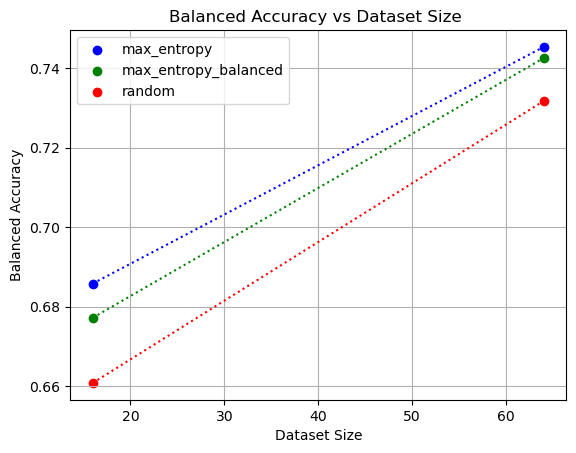

In [2]:
relevant_columns = ['setting', 'dataset_size', 'accuracy', 'balanced_accuracy']
nuevo_df = df[relevant_columns].copy()

# Calcular la media de accuracies y balanced accuracies agrupadas por las columnas relevantes
df_means = nuevo_df.groupby(['setting', 'dataset_size']).mean().reset_index()
import matplotlib.pyplot as plt

# Crear un diccionario para mapear colores a cada setting
color_map = {'max_entropy': 'blue', 'max_entropy_balanced': 'green', 'random': 'red'}

# Crear el gráfico de dispersión
for setting, color in color_map.items():
    setting_data = df_means[df_means['setting'] == setting]
    plt.scatter(setting_data['dataset_size'], setting_data['balanced_accuracy'], 
                color=color, 
                label=setting)

    # Agregar una línea de puntos para cada configuración
    plt.plot(setting_data['dataset_size'], setting_data['balanced_accuracy'], 
             linestyle=':', color=color)

# Ajustes visuales del gráfico
plt.xlabel('Dataset Size')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy vs Dataset Size ')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


# Unlabeled samples and Balanced accuracy

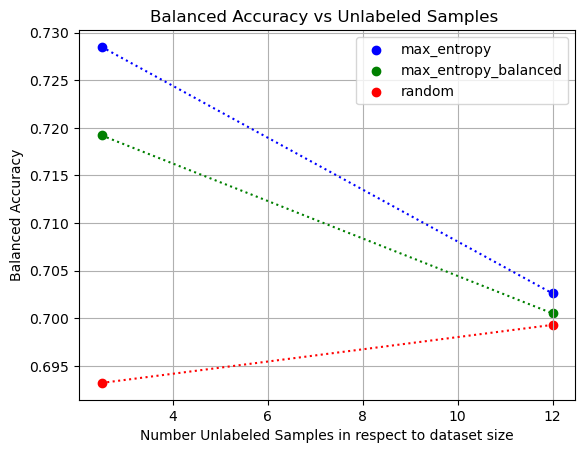

In [3]:
relevant_columns = ['setting', 'unlabeled_samples', 'accuracy', 'balanced_accuracy']
nuevo_df = df[relevant_columns].copy()
# Suponiendo que la columna se llama 'unlabeled_samples' en tu DataFrame nuevo_df_means
nuevo_df['unlabeled_samples'] = nuevo_df['unlabeled_samples'].apply(lambda x: 2.5 if x in [40, 160] else 12,5)

# Calcular la media de accuracies y balanced accuracies agrupadas por las columnas relevantes
df_means = nuevo_df.groupby(['setting', 'unlabeled_samples']).mean().reset_index()
import matplotlib.pyplot as plt

# Crear un diccionario para mapear colores a cada setting
color_map = {'max_entropy': 'blue', 'max_entropy_balanced': 'green', 'random': 'red'}

# Crear el gráfico de dispersión
for setting, color in color_map.items():
    setting_data = df_means[df_means['setting'] == setting]
    plt.scatter(setting_data['unlabeled_samples'], setting_data['balanced_accuracy'], 
                color=color, 
                label=setting)

    # Agregar una línea de puntos para cada configuración
    plt.plot(setting_data['unlabeled_samples'], setting_data['balanced_accuracy'], 
             linestyle=':', color=color)

# Ajustes visuales del gráfico
plt.xlabel('Number Unlabeled Samples in respect to dataset size')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy vs Unlabeled Samples ')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()
